Epoch 0: Loss = 53220992377.85487
Epoch 100: Loss = 6737303744.01539
Epoch 200: Loss = 5599774961.182909
Epoch 300: Loss = 5381888601.142737
Epoch 400: Loss = 5239663147.380758
Epoch 500: Loss = 5138392553.472855
Epoch 600: Loss = 5065436467.984563
Epoch 700: Loss = 5012473672.264975
Epoch 800: Loss = 4973773602.1691475
Epoch 900: Loss = 4945328285.352403

Final Weights: [-64096.56417353 -68768.86959372  17599.22295564 -11517.75616937
  27634.22020357 -37736.90324659  28910.68147547  74206.94841544]
Final Bias: 205846.27465356735


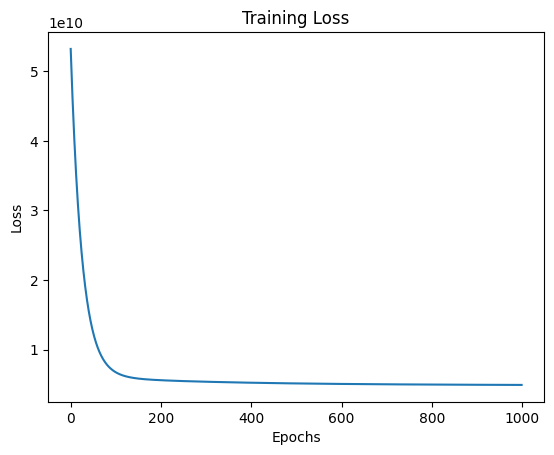

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Loading the dataset from a CSV file and separate features and target.
def load_data(file_path):


    data = pd.read_csv(file_path)
    y = data["median_house_value"].values  # Target aka y column
    X = data.drop(columns=["median_house_value"]).values  # Feature columns
    return X, y

 #“loss” - Takes in the predictions and the true labels and returns the MSE loss (Mean Squared Error)
def loss(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)

#“y_prediction” - Takes in the arrays a(weight vector), x(input vector), b(bias vector) and returns the predicted value
def y_prediction(X, weights, bias):
    return np.dot(X, weights) + bias

#“gradient” - Takes in the arrays a(weight vector), x(input vector), b(bias vector) and y_true (true label vector), returns the gradient
#the gradient is the differential of the loss function
def gradient(X, y_true, weights, bias):
    n_samples = len(y_true)
    y_pred = y_prediction(X, weights, bias)
    error = y_pred - y_true

    weight_gradient = (2 / n_samples) * np.dot(X.T, error)
    bias_gradient = (2 / n_samples) * np.sum(error)

    return weight_gradient, bias_gradient

#"gradient descent"- to compute the gradient and update the weights accordingly
def gradient_descent(X, y_true, learning_rate=0.01, epochs=1000):
    n_features = X.shape[1]
    weights = np.zeros(n_features)
    bias = 0
    loss_history = []

    for epoch in range(epochs):
        # Compute gradients
        weight_gradient, bias_gradient = gradient(X, y_true, weights, bias)

        # Update weights and bias
        weights -= learning_rate * weight_gradient
        bias -= learning_rate * bias_gradient

        # Compute loss and store it
        y_pred = y_prediction(X, weights, bias)
        current_loss = loss(y_pred, y_true)
        loss_history.append(current_loss)

        # Print loss every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {current_loss}")

    return weights, bias, loss_history


if __name__ == "__main__":
    file_path = '/content/sample_data/california_housing_test.csv'
    X, y = load_data(file_path)

    # Normalizing features for better performance
    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

   # Performing gradient descent
    learning_rate = 0.01
    epochs = 1000
    weights, bias, train_loss = gradient_descent(X, y, learning_rate, epochs)

    print("\nFinal Weights:", weights)
    print("Final Bias:", bias)

    # Plotting the loss curve
    plt.plot([i for i in range(epochs)], train_loss)
    plt.title("Training Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()
